In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import data
df = pd.read_csv("solutions/frequenzen_hardbruecke_2024 (2).csv")
df

#More Info on website we retrieve data from: https://data.stadt-zuerich.ch/dataset/vbz_frequenzen_hardbruecke
#Particularly important note for year 2024 (From website):
#Bekannte Sensorausfälle: 20.12.2023 - ca. 15.01.2024: Wegen Unterhaltsarbeiten lieferte die Schnittstelle keine Zähldaten.

#Genereller Hinweis: Das Zählsystem an der Hardbrücke ist erst seit Q4 2019 im Betrieb. Es kann generell zu einzelnen Datenlücken kommen. 
#Die VBZ arbeitet laufend daran, bekannte Datenlücken wenn möglich zu minimieren. Die Daten können somit stets überschrieben werden

In  Out            Timestamp             Name
0        2    6  2024-01-16T14:55:00   Ost-Nord total
1       10   17  2024-01-16T14:55:00    Ost-SBB total
2        5    2  2024-01-16T14:55:00    Ost-Süd total
3       13    3  2024-01-16T14:55:00    Ost-VBZ Total
4        8    4  2024-01-16T14:55:00  West-Nord total
...     ..  ...                  ...              ...
605649  68   94  2024-11-12T08:55:00    Ost-VBZ Total
605650  10   15  2024-11-12T08:55:00  West-Nord total
605651  97   26  2024-11-12T08:55:00   West-SBB total
605652   9   21  2024-11-12T08:55:00   West-Süd total
605653  33   83  2024-11-12T08:55:00   West-VBZ total

[605654 rows x 4 columns]

In [3]:
# Transform the smaller dataset to wide format
df_wide = df.pivot_table(
    index="Timestamp", columns= "Name", values=["In", "Out"]).reset_index()
# Display the wide data
df_wide

Timestamp             In                              \
Name                       Ost-Nord total Ost-SBB total Ost-Süd total   
0      2024-01-16T14:55:00            2.0          10.0           5.0   
1      2024-01-16T15:00:00            5.0          13.0          14.0   
2      2024-01-16T15:05:00            4.0          16.0          12.0   
3      2024-01-16T15:10:00            9.0          16.0           8.0   
4      2024-01-16T15:15:00            3.0          15.0           9.0   
...                    ...            ...           ...           ...   
82616  2024-11-12T08:35:00            4.0          60.0          33.0   
82617  2024-11-12T08:40:00            7.0          49.0          35.0   
82618  2024-11-12T08:45:00            7.0          86.0          31.0   
82619  2024-11-12T08:50:00            3.0          97.0          34.0   
82620  2024-11-12T08:55:00            6.0         106.0          33.0   

                                                                   \
Name  Ost-VBZ Total West-Nord total West-SBB total West-Süd total   
0              13.0             8.0           13.0            4.0   
1              14.0             6.0           20.0            4.0   
2              29.0            11.0           19.0            6.0   
3              18.0            12.0           24.0            5.0   
4              33.0            13.0           17.0            4.0   
...             ...             ...            ...            ...   
82616          62.0            14.0           30.0           19.0   
82617          76.0            14.0          160.0           16.0   
82618          70.0            13.0           96.0           10.0   
82619          35.0             7.0           57.0            7.0   
82620          68.0            10.0           97.0            9.0   

                                Out                                            \
Name  West-VBZ total Ost-Nord total Ost-SBB total Ost-Süd total Ost-VBZ Total   
0               20.0            6.0          17.0           2.0           3.0   
1               11.0           12.0          32.0           4.0           8.0   
2                6.0           16.0          42.0           6.0           8.0   
3                9.0            4.0          24.0           7.0          18.0   
4               16.0            8.0          42.0           4.0          12.0   
...              ...            ...           ...           ...           ...   
82616            6.0           59.0          52.0          15.0          36.0   
82617           36.0           60.0          58.0          10.0          42.0   
82618           31.0           62.0          43.0          13.0          86.0   
82619           11.0           44.0          33.0          15.0          80.0   
82620           33.0           66.0          55.0          12.0          94.0   

                                                                    
Name  West-Nord total West-SBB total West-Süd total West-VBZ total  
0                 4.0           21.0            3.0           17.0  
1                 1.0           14.0            3.0           25.0  
2                 0.0           14.0            8.0           21.0  
3                 6.0           18.0            8.0           16.0  
4                 3.0           18.0           11.0           23.0  
...               ...            ...            ...            ...  
82616            10.0           20.0           25.0            7.0  
82617            23.0           34.0           26.0          145.0  
82618            14.0           27.0           12.0           99.0  
82619            12.0           11.0           10.0           48.0  
82620            15.0           26.0           21.0           83.0  

[82621 rows x 17 columns]

In [4]:
#Troubleshooting: verifying if dataframe is MultiIndex
df_wide.columns.tolist()

[('Timestamp', ''),
 ('In', 'Ost-Nord total'),
 ('In', 'Ost-SBB total'),
 ('In', 'Ost-Süd total'),
 ('In', 'Ost-VBZ Total'),
 ('In', 'West-Nord total'),
 ('In', 'West-SBB total'),
 ('In', 'West-Süd total'),
 ('In', 'West-VBZ total'),
 ('Out', 'Ost-Nord total'),
 ('Out', 'Ost-SBB total'),
 ('Out', 'Ost-Süd total'),
 ('Out', 'Ost-VBZ Total'),
 ('Out', 'West-Nord total'),
 ('Out', 'West-SBB total'),
 ('Out', 'West-Süd total'),
 ('Out', 'West-VBZ total')]

In [5]:
#We just need TimeStamp and In and Outflow for the Ost-VBZ Total and West-WBZ Total
#Selecting columns that we need 
relevant_columns = [('Timestamp', ''), ('In', 'Ost-VBZ Total'), ('In', 'West-VBZ total'), ('Out', 'Ost-VBZ Total'), ('Out', 'West-VBZ total')]
df_VBZ = df_wide[relevant_columns]
df_VBZ

Timestamp            In                          Out  \
Name                       Ost-VBZ Total West-VBZ total Ost-VBZ Total   
0      2024-01-16T14:55:00          13.0           20.0           3.0   
1      2024-01-16T15:00:00          14.0           11.0           8.0   
2      2024-01-16T15:05:00          29.0            6.0           8.0   
3      2024-01-16T15:10:00          18.0            9.0          18.0   
4      2024-01-16T15:15:00          33.0           16.0          12.0   
...                    ...           ...            ...           ...   
82616  2024-11-12T08:35:00          62.0            6.0          36.0   
82617  2024-11-12T08:40:00          76.0           36.0          42.0   
82618  2024-11-12T08:45:00          70.0           31.0          86.0   
82619  2024-11-12T08:50:00          35.0           11.0          80.0   
82620  2024-11-12T08:55:00          68.0           33.0          94.0   

                      
Name  West-VBZ total  
0               17.0  
1               25.0  
2               21.0  
3               16.0  
4               23.0  
...              ...  
82616            7.0  
82617          145.0  
82618           99.0  
82619           48.0  
82620           83.0  

[82621 rows x 5 columns]

In [6]:
#Verify if there are missing values
df_VBZ.isna().sum()

           Name          
Timestamp                       0
In         Ost-VBZ Total     7869
           West-VBZ total    9299
Out        Ost-VBZ Total     7869
           West-VBZ total    9299
dtype: int64

In [7]:
#Are there observations with value 0?
df_VBZ[df_VBZ[('In', 'Ost-VBZ Total')] == 0]

Timestamp            In                          Out  \
Name                       Ost-VBZ Total West-VBZ total Ost-VBZ Total   
80     2024-01-16T21:35:00           0.0            4.0           2.0   
91     2024-01-16T22:30:00           0.0            3.0           1.0   
113    2024-01-17T00:20:00           0.0            0.0           3.0   
119    2024-01-17T00:55:00           0.0            NaN           1.0   
133    2024-01-17T04:05:00           0.0            2.0           2.0   
...                    ...           ...            ...           ...   
82532  2024-11-11T23:35:00           0.0            0.0           1.0   
82539  2024-11-12T00:10:00           0.0            1.0           1.0   
82543  2024-11-12T00:30:00           0.0            NaN           2.0   
82564  2024-11-12T04:05:00           0.0            3.0           1.0   
82574  2024-11-12T05:05:00           0.0            1.0           1.0   

                      
Name  West-VBZ total  
80              15.0  
91               0.0  
113              6.0  
119              NaN  
133              3.0  
...              ...  
82532            3.0  
82539            7.0  
82543            NaN  
82564            2.0  
82574            0.0  

[2291 rows x 5 columns]

# Dealing with Missing Data

In [8]:
df_VBZ.isna().sum()

           Name          
Timestamp                       0
In         Ost-VBZ Total     7869
           West-VBZ total    9299
Out        Ost-VBZ Total     7869
           West-VBZ total    9299
dtype: int64

In [9]:
#There are some missing values. Substitute them with given value and plot time series to see where they are
df_VBZ_20m = df_VBZ.copy() #store a copy of the df_VBZ dataset for aggregation

## Data Aggregation

In [10]:
#Aggregating data to have observation every 20 minutes
df_VBZ_20m['Timestamp'] = pd.to_datetime(df_VBZ['Timestamp']) #Convert Timestamp variable into datetime format
df_VBZ_20m.set_index("Timestamp", inplace = True) #Set Timestamp variable as index
df_VBZ_20m = df_VBZ_20m.resample('20T').sum() #Aggregate observations by summing them together to have value every 20 minutes
df_VBZ_20m #Observations now have Time under index Timestamp where observation begins, meaning values cover Time interval comprised
#between Timestamp value and the following 20 minutes. Ex. obs. no. 2 (Timestamp = "2024-01-16 15:00:00) record values for interval 
#15:00:00-15:20:00

In                          Out               
Name                Ost-VBZ Total West-VBZ total Ost-VBZ Total West-VBZ total
Timestamp                                                                    
2024-01-16 14:40:00          13.0           20.0           3.0           17.0
2024-01-16 15:00:00          94.0           42.0          46.0           85.0
2024-01-16 15:20:00         177.0           95.0          49.0          133.0
2024-01-16 15:40:00         142.0          101.0          46.0          148.0
2024-01-16 16:00:00         240.0          131.0          66.0          159.0
...                           ...            ...           ...            ...
2024-11-12 07:20:00         325.0          119.0         328.0          370.0
2024-11-12 07:40:00         322.0           93.0         322.0          420.0
2024-11-12 08:00:00         380.0          106.0         217.0          324.0
2024-11-12 08:20:00         299.0          102.0         249.0          347.0
2024-11-12 08:40:00         249.0          111.0         302.0          375.0

[21655 rows x 4 columns]

## Imputation of missing values by interpolation

In [11]:
#Substitute missing values by interpolating (mean bewtween last and next healthy datapoint)
# Forward fill and backward fill
#For Ost-VBZ Total In
forward_filled_ost_in = df_VBZ_20m[('In','Ost-VBZ Total')].ffill()
backward_filled_ost_in = df_VBZ_20m[('In','Ost-VBZ Total')].bfill()
#For West-VBZ total In 
forward_filled_west_in = df_VBZ_20m[('In','West-VBZ total')].ffill()
backward_filled_west_in = df_VBZ_20m[('In','West-VBZ total')].bfill()
#For Ost-VBZ Total Out
forward_filled_ost_out = df_VBZ_20m[('Out','Ost-VBZ Total')].ffill()
backward_filled_ost_out = df_VBZ_20m[('Out','Ost-VBZ Total')].bfill()
#For West-VBZ total Out
forward_filled_west_out = df_VBZ_20m[('Out','West-VBZ total')].ffill()
backward_filled_west_out = df_VBZ_20m[('Out','West-VBZ total')].bfill()

# Replace NaN with the mean of forward and backward fill
df_VBZ_20m[('In','Ost-VBZ Total')] = df_VBZ_20m[('In','Ost-VBZ Total')].fillna((forward_filled_ost_in + backward_filled_ost_in) / 2)
df_VBZ_20m[('In','West-VBZ total')] = df_VBZ_20m[('In','West-VBZ total')].fillna((forward_filled_west_in + backward_filled_west_in) / 2)
df_VBZ_20m[('Out','Ost-VBZ Total')] = df_VBZ_20m[('Out','Ost-VBZ Total')].fillna((forward_filled_ost_out + backward_filled_ost_out) / 2)
df_VBZ_20m[('Out','West-VBZ total')] = df_VBZ_20m[('Out','West-VBZ total')].fillna((forward_filled_west_out + backward_filled_west_out) / 2)


In [12]:
df_VBZ_20m.isna().sum()

     Name          
In   Ost-VBZ Total     0
     West-VBZ total    0
Out  Ost-VBZ Total     0
     West-VBZ total    0
dtype: int64

# Time Series plot of the whole 2024 dataset

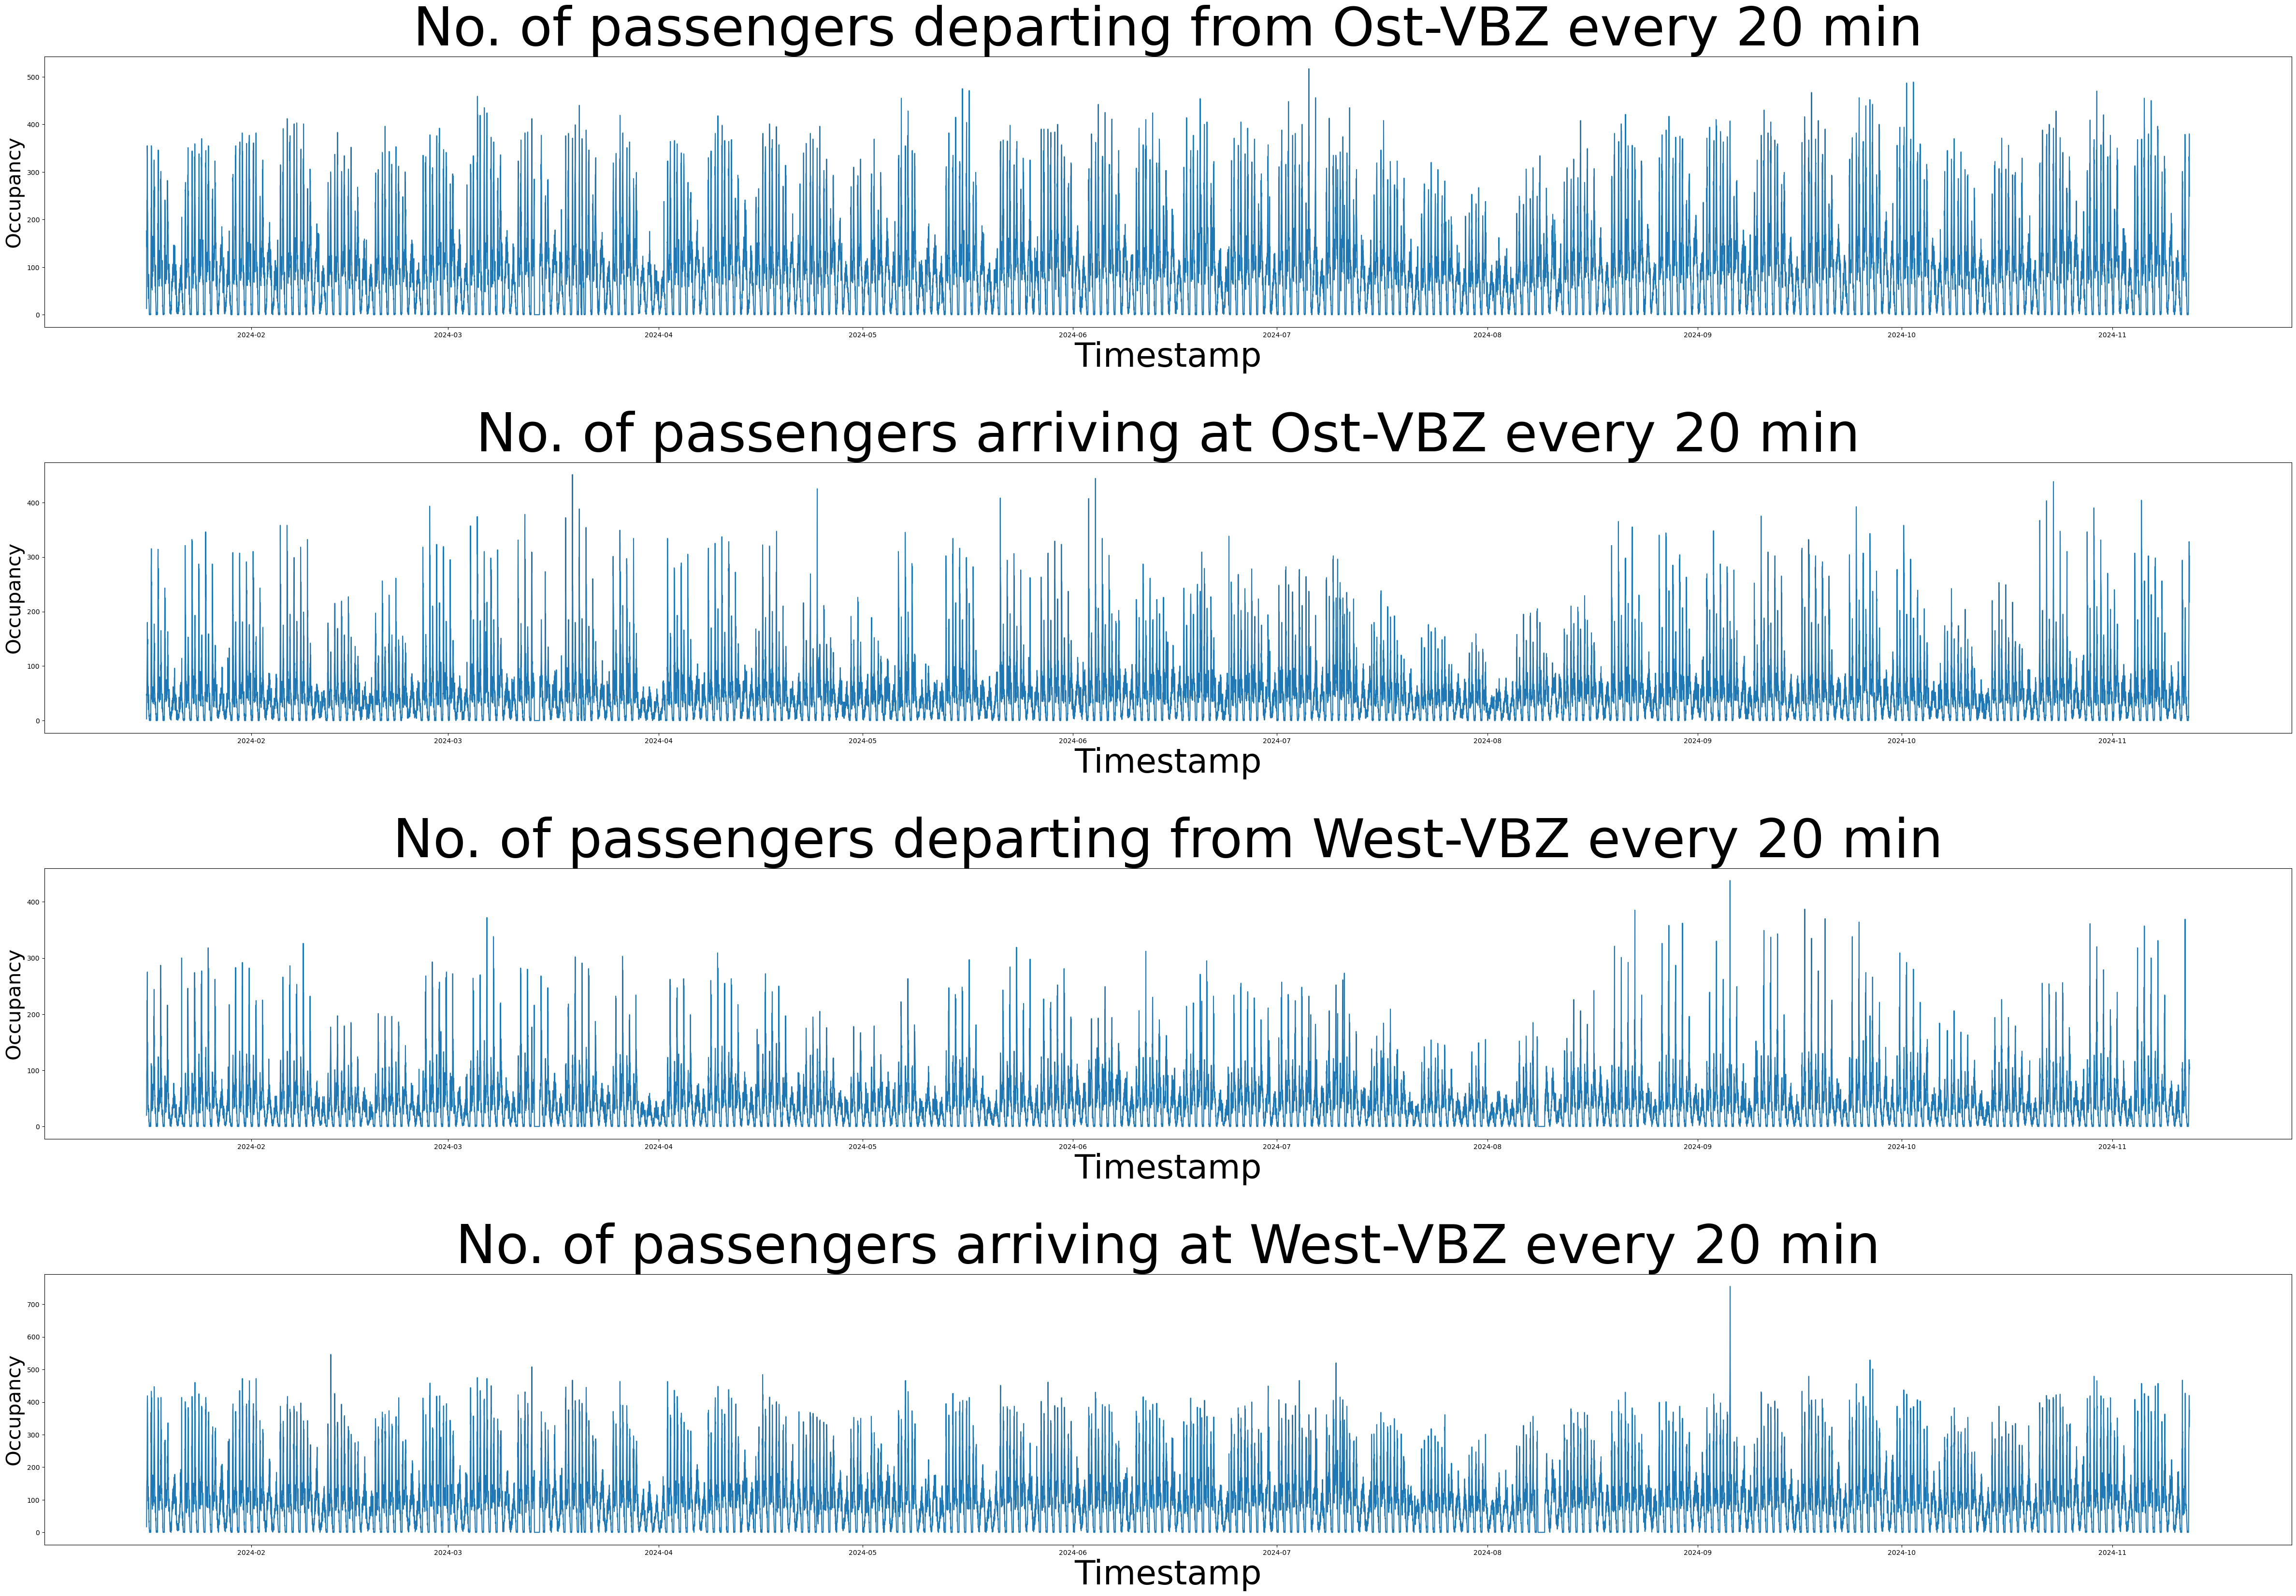

In [13]:
#Plot Time Series
#Define series 
#For Ost-VBZ (Haltestelle Hardbrücke mit Fahrtrichtung Schiffbau)
Ost_in = df_VBZ_20m[("In", "Ost-VBZ Total")]
Ost_out = df_VBZ_20m[("Out", "Ost-VBZ Total")]
#For West-VBZ (Haltestelle Hardbrücke mit Fahrtrichtung Hardplatz)
West_in = df_VBZ_20m[("In", "West-VBZ total")]
West_out = df_VBZ_20m[("Out", "West-VBZ total")]

#Plotting time series
fig, ax = plt.subplots(4,1,figsize = (60, 40))
ax[0].plot(df_VBZ_20m.index, Ost_in)
ax[1].plot(df_VBZ_20m.index, Ost_out)
ax[2].plot(df_VBZ_20m.index, West_in)
ax[3].plot(df_VBZ_20m.index, West_out)
#Labels for axis
ax[0].set_xlabel("Timestamp", fontsize = 50)
ax[0].set_ylabel("Occupancy", fontsize = 30)
ax[0].set_title("No. of passengers departing from Ost-VBZ every 20 min", fontsize = 80)

ax[1].set_xlabel("Timestamp", fontsize = 50)
ax[1].set_ylabel("Occupancy", fontsize = 30)
ax[1].set_title("No. of passengers arriving at Ost-VBZ every 20 min", fontsize = 80)

ax[2].set_xlabel("Timestamp", fontsize = 50)
ax[2].set_ylabel("Occupancy", fontsize = 30)
ax[2].set_title("No. of passengers departing from West-VBZ every 20 min", fontsize = 80)

ax[3].set_xlabel("Timestamp", fontsize = 50)
ax[3].set_ylabel("Occupancy", fontsize = 30)
ax[3].set_title("No. of passengers arriving at West-VBZ every 20 min", fontsize = 80)

plt.subplots_adjust(hspace = 0.5)

# Time series plot for the first 5000 observations hours (Several months)

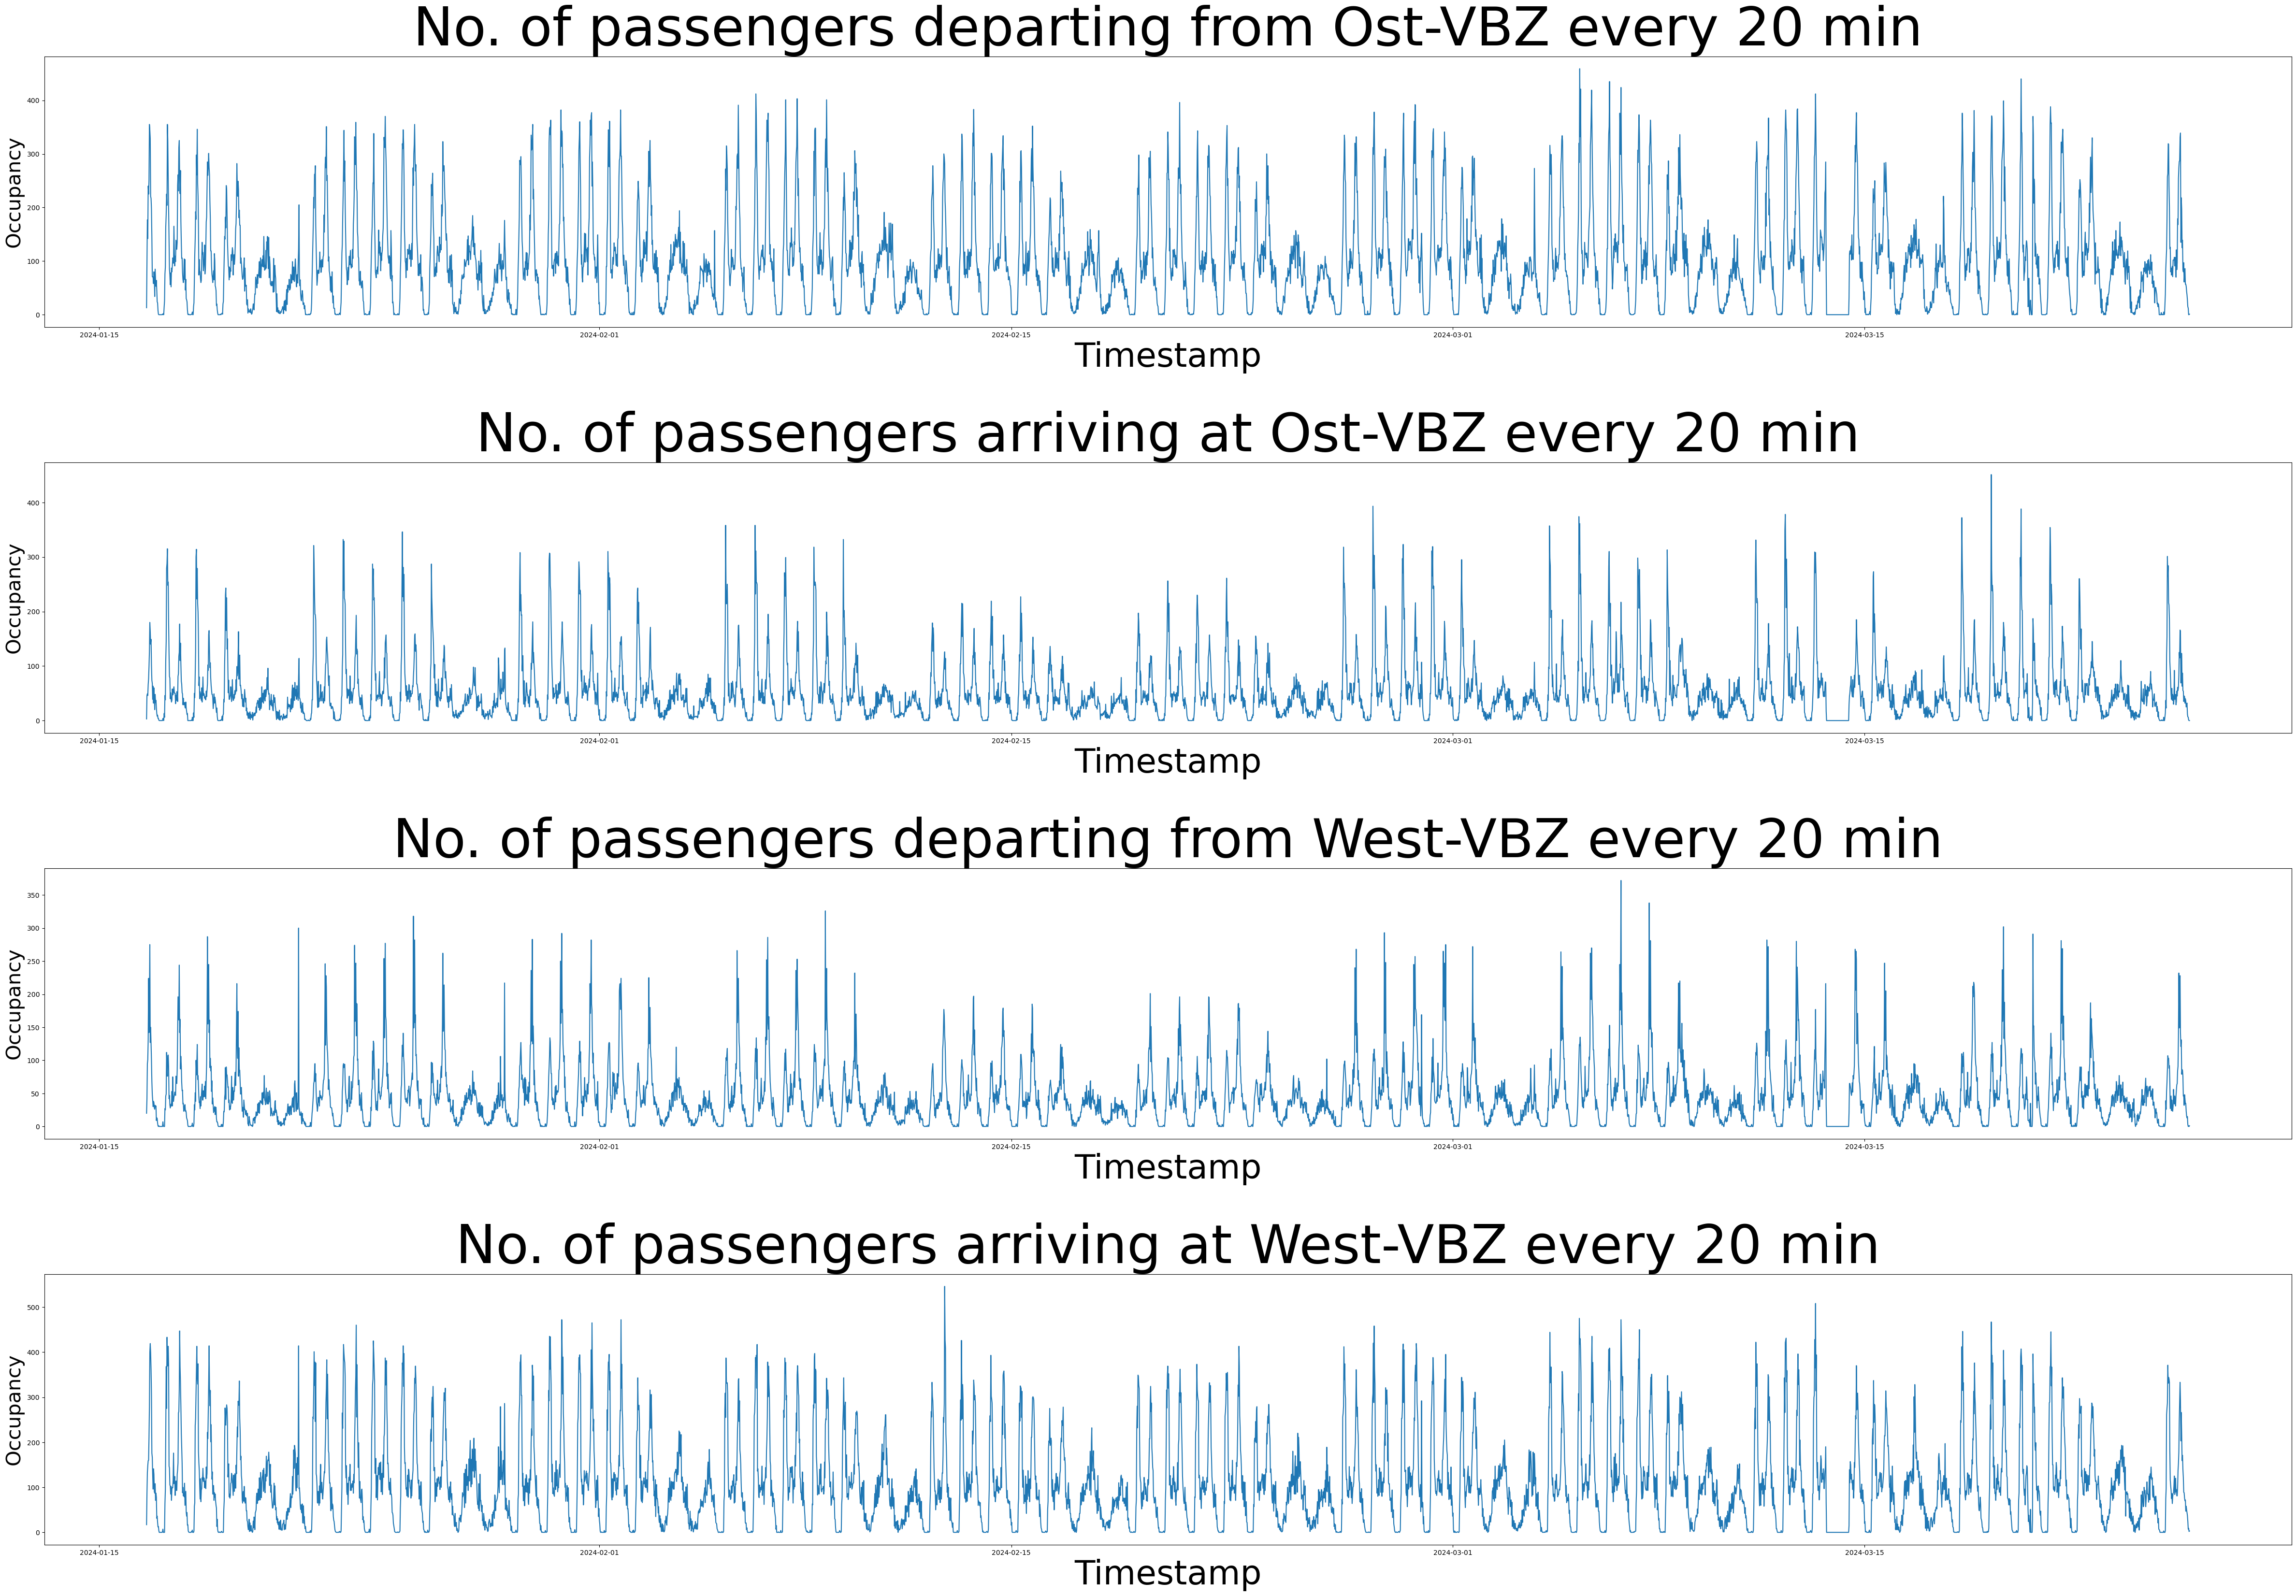

In [14]:
#Time series for only the first 5000 observations
#Plotting time series
fig, ax = plt.subplots(4,1,figsize = (60, 40))
ax[0].plot(df_VBZ_20m.index[:5000], Ost_in.head(5000))
ax[1].plot(df_VBZ_20m.index[:5000], Ost_out.head(5000))
ax[2].plot(df_VBZ_20m.index[:5000], West_in.head(5000))
ax[3].plot(df_VBZ_20m.index[:5000], West_out.head(5000))
#Labels for axis
ax[0].set_xlabel("Timestamp", fontsize = 50)
ax[0].set_ylabel("Occupancy", fontsize = 30)
ax[0].set_title("No. of passengers departing from Ost-VBZ every 20 min", fontsize = 80)

ax[1].set_xlabel("Timestamp", fontsize = 50)
ax[1].set_ylabel("Occupancy", fontsize = 30)
ax[1].set_title("No. of passengers arriving at Ost-VBZ every 20 min", fontsize = 80)

ax[2].set_xlabel("Timestamp", fontsize = 50)
ax[2].set_ylabel("Occupancy", fontsize = 30)
ax[2].set_title("No. of passengers departing from West-VBZ every 20 min", fontsize = 80)

ax[3].set_xlabel("Timestamp", fontsize = 50)
ax[3].set_ylabel("Occupancy", fontsize = 30)
ax[3].set_title("No. of passengers arriving at West-VBZ every 20 min", fontsize = 80)

plt.subplots_adjust(hspace = 0.5)

# Time series plot for 24 hours - Occupancy of the Stations throughout a day 
Time series for (almost) the whole 2024 year or for several months are a bit difficult to read. Let's see how the occupancy changes throughout a single day

In [15]:
#Time series for 24 hours
#The previously created subsets are not dataframes, convert them first and reset index
Ost_in_df = pd.DataFrame(Ost_in)
Ost_in_df = Ost_in_df.reset_index()

Ost_out_df = pd.DataFrame(Ost_out)
Ost_out_df = Ost_out_df.reset_index()

West_in_df = pd.DataFrame(West_in)
West_in_df = West_in_df.reset_index()

West_out_df = pd.DataFrame(West_out)
West_out_df = West_out_df.reset_index()

#Select observation for only one day (17th of January 2024)
Ost_in_df[Ost_in_df["Timestamp"] == "2024-01-17 00:00:00"] #index 28
Ost_in_df[Ost_in_df["Timestamp"] == "2024-01-17 23:40:00"] #index 99

Ost_in_df_day = Ost_in_df[28:100]
Ost_out_df_day = Ost_out_df[28:100]
West_in_df_day = West_in_df[28:100]
West_out_df_day = West_out_df[28:100]

#For practicality, get rid of multindex, since it's useless here (data with only one column)
Ost_in_df_day = Ost_in_df_day.droplevel(level=0, axis=1)
Ost_in_df_day.rename(columns = {'':'Timestamp'}, inplace = True)

Ost_out_df_day = Ost_out_df_day.droplevel(level=0, axis=1)
Ost_out_df_day.rename(columns = {'':'Timestamp'}, inplace = True)

West_in_df_day = West_in_df_day.droplevel(level=0, axis=1)
West_in_df_day.rename(columns = {'':'Timestamp'}, inplace = True)

West_out_df_day = West_out_df_day.droplevel(level=0, axis=1)
West_out_df_day.rename(columns = {'':'Timestamp'}, inplace = True)

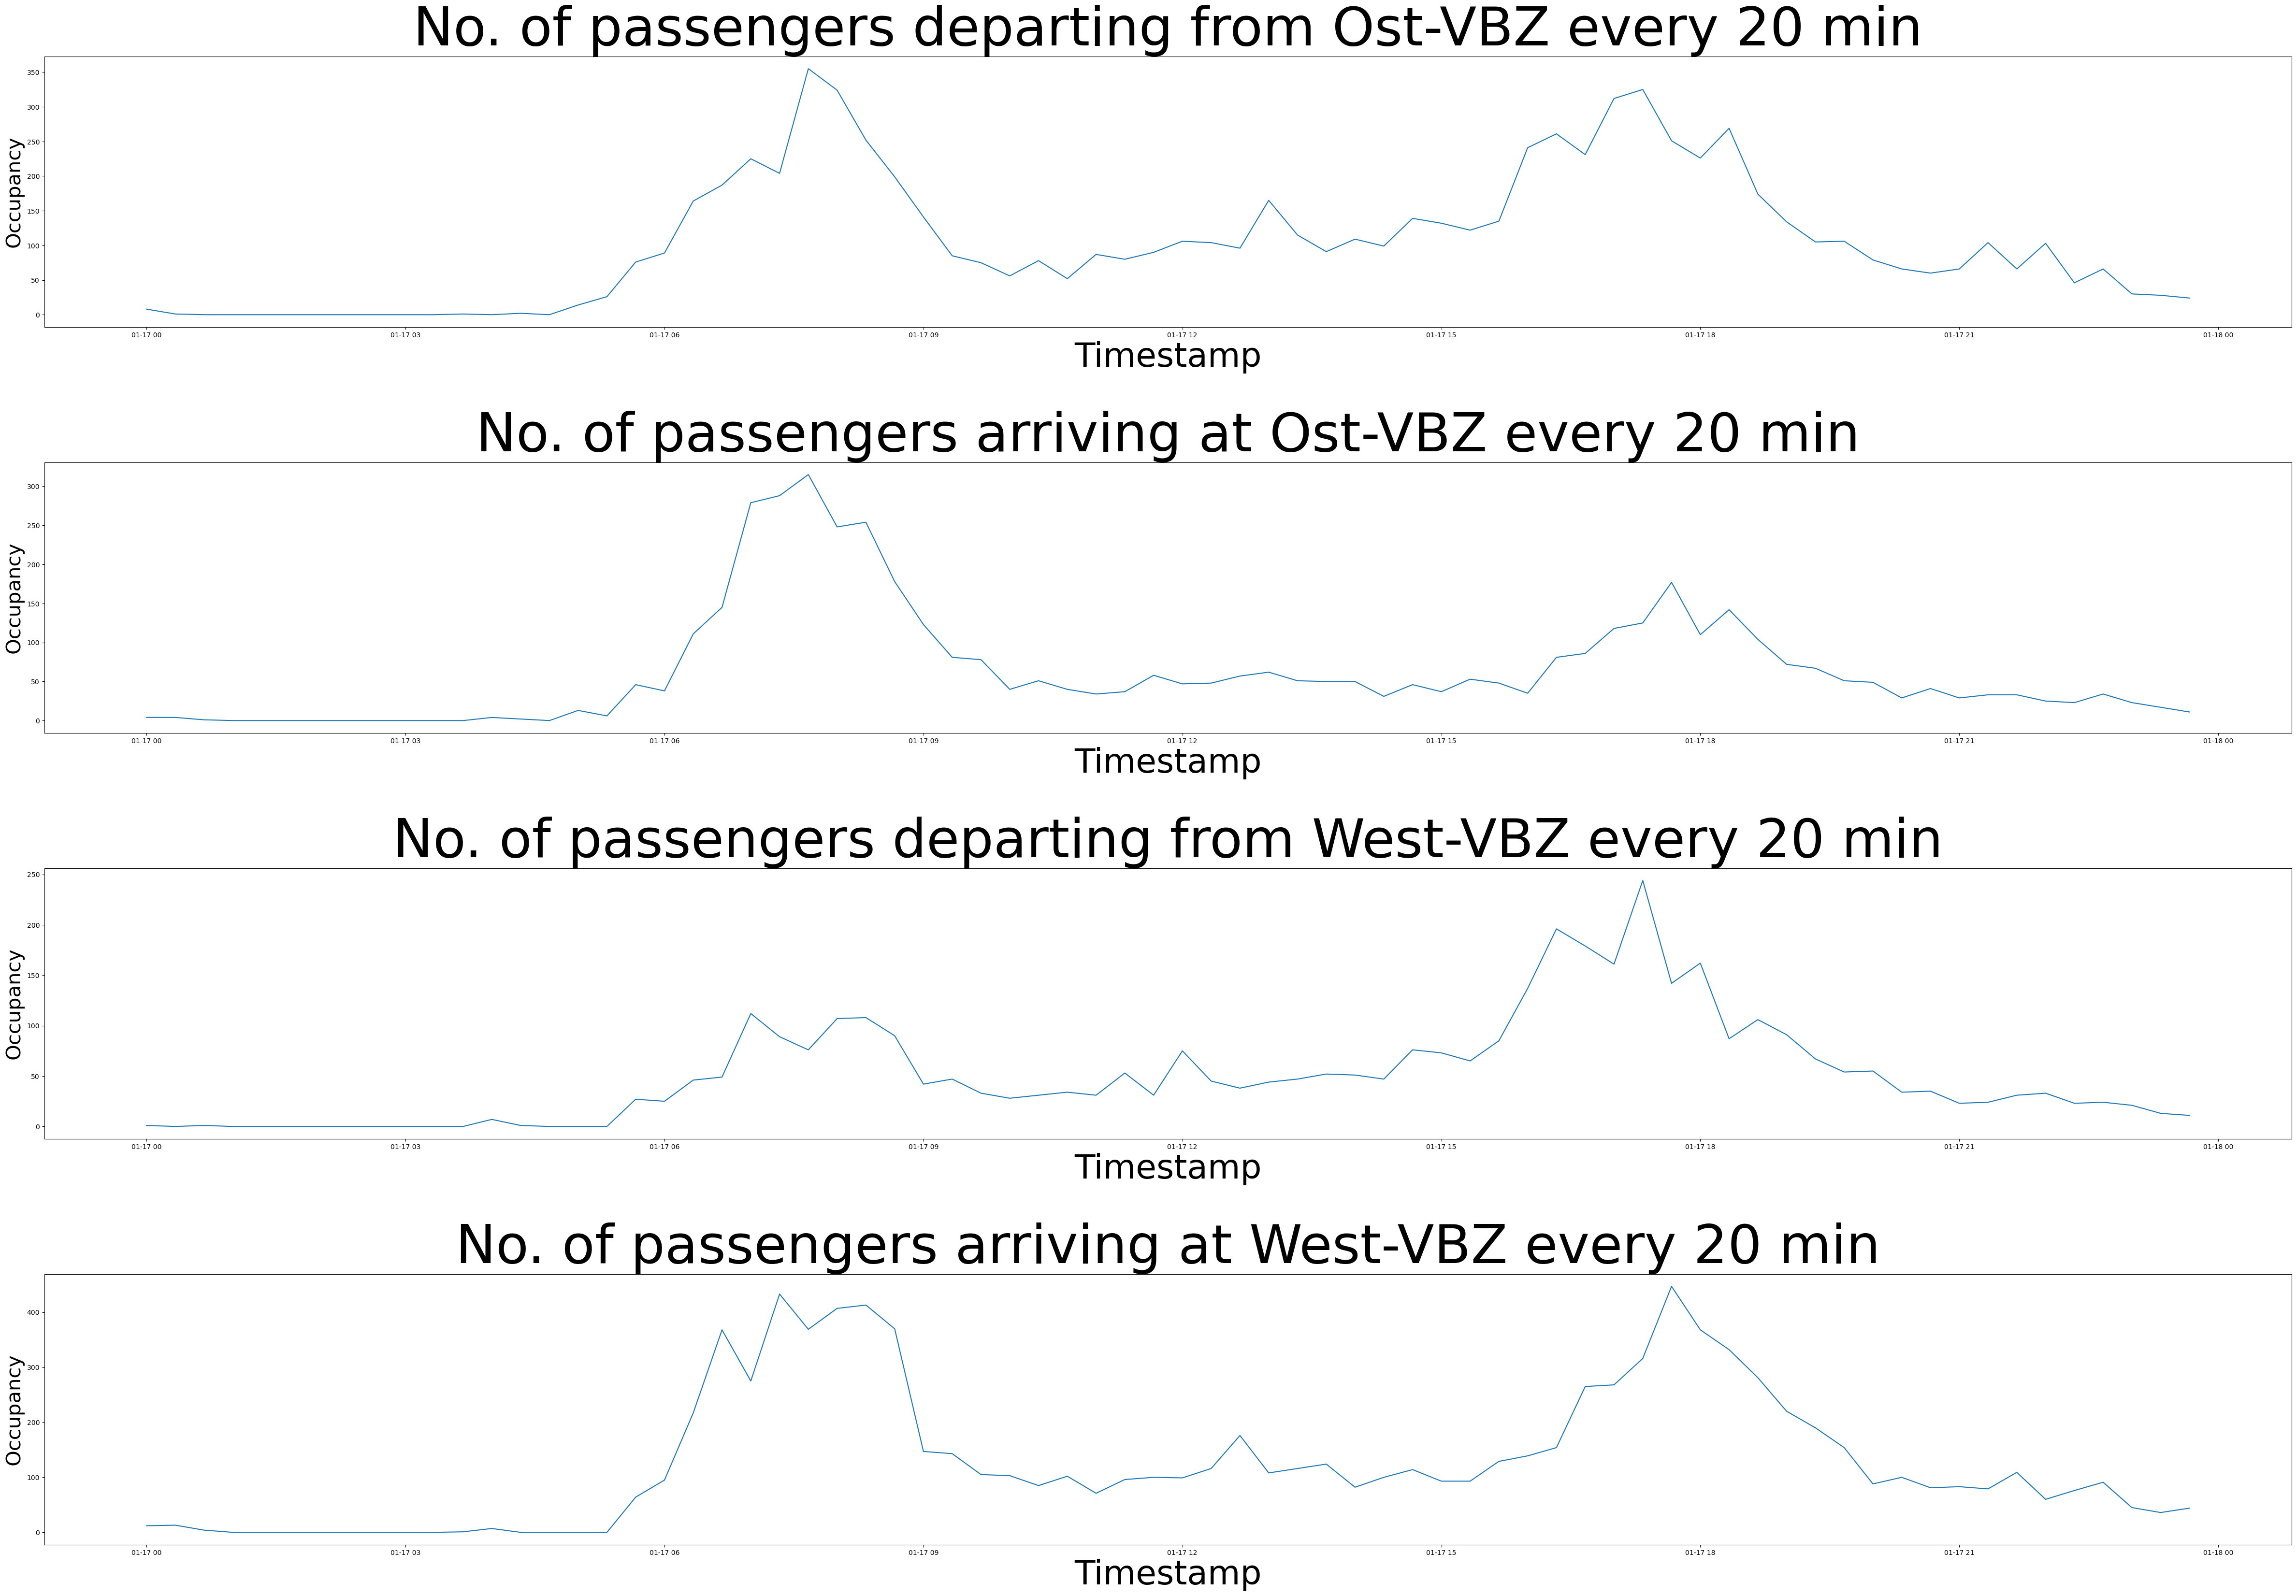

In [16]:
#Plotting time series every 24 hours
fig, ax = plt.subplots(4,1,figsize = (60, 40))
ax[0].plot(Ost_in_df_day["Timestamp"], Ost_in_df_day["Ost-VBZ Total"])
ax[1].plot(Ost_out_df_day["Timestamp"], Ost_out_df_day["Ost-VBZ Total"])
ax[2].plot(West_in_df_day["Timestamp"], West_in_df_day["West-VBZ total"])
ax[3].plot(West_out_df_day["Timestamp"], West_out_df_day["West-VBZ total"])
#Labels for axis
ax[0].set_xlabel("Timestamp", fontsize = 50)
ax[0].set_ylabel("Occupancy", fontsize = 30)
ax[0].set_title("No. of passengers departing from Ost-VBZ every 20 min", fontsize = 80)

ax[1].set_xlabel("Timestamp", fontsize = 50)
ax[1].set_ylabel("Occupancy", fontsize = 30)
ax[1].set_title("No. of passengers arriving at Ost-VBZ every 20 min", fontsize = 80)

ax[2].set_xlabel("Timestamp", fontsize = 50)
ax[2].set_ylabel("Occupancy", fontsize = 30)
ax[2].set_title("No. of passengers departing from West-VBZ every 20 min", fontsize = 80)

ax[3].set_xlabel("Timestamp", fontsize = 50)
ax[3].set_ylabel("Occupancy", fontsize = 30)
ax[3].set_title("No. of passengers arriving at West-VBZ every 20 min", fontsize = 80)

plt.subplots_adjust(hspace = 0.5)

## Behaviour of missing data 
We get back to the original df_VBZ dataframe where data has not been dealt with interpolation, but simply substituted by -200. We plot the series to see where missing values are located (Where missing is going to be visible by negative value). We rely on a relatively high negative number as substitute for Missing datapoints to avoid that neighboring datapoints with a positive value are going to compensate for the missing value during the data aggregation.

In [17]:
#Goal: observe behaviour of missing data through the series. Before setting a negative value for missing data, let's see the upper
#threshold the value should have, in order for neighboring observations not to bring observation value above 0 and hide missing value

#Copying df_VBZ and create dataframe with obs aggregated every 20 minutes and where Nan are substituted by 0
df_VBZ_0 = df_VBZ.copy()

df_VBZ_0.fillna(value = 0)
df_VBZ_0['Timestamp'] = pd.to_datetime(df_VBZ['Timestamp']) #Convert Timestamp variable into datetime format
df_VBZ_0.set_index("Timestamp", inplace = True) #Set Timestamp variable as index
df_VBZ_0 = df_VBZ_20m.resample('20T').sum() #Aggregate observations by summing them together to have value every 20 minutes

print(df_VBZ_0.describe())

                 In                          Out               
Name  Ost-VBZ Total West-VBZ total Ost-VBZ Total West-VBZ total
count  21655.000000   21655.000000  21655.000000   21655.000000
mean      98.031217      44.479889     53.365227     103.912260
std       87.438646      45.302866     55.667099      93.546146
min        0.000000       0.000000      0.000000       0.000000
25%       27.000000      11.000000     14.000000      29.000000
50%       85.000000      36.000000     42.000000      89.000000
75%      130.000000      59.000000     67.000000     136.000000
max      517.000000     438.000000    451.000000     755.000000


In [18]:
#Maximum value for an observation in the whole dataset is 755, consequently set substitute for NaN lower than -755

In [19]:
df_VBZ_20m_mv = df_VBZ.copy()
df_VBZ_20m_mv = df_VBZ_mv.fillna(value = -1000)

NameError: name 'df_VBZ_mv' is not defined

In [ ]:
#Aggregating data to have observation every 20 minutes
df_VBZ_20m_mv['Timestamp'] = pd.to_datetime(df_VBZ_20m_mv['Timestamp']) #Convert Timestamp variable into datetime format
df_VBZ_20m_mv.set_index("Timestamp", inplace = True) #Set Timestamp variable as index
df_VBZ_20m_mv = df_VBZ_20m_mv.resample('20T').sum() #Aggregate observations by summing them together to have value every 20 minutes

In [ ]:
#Plot Time Series
#Define series 
#For Ost-VBZ (Haltestelle Hardbrücke mit Fahrtrichtung Schiffbau)
Ost_in_mv = df_VBZ_20m_mv[("In", "Ost-VBZ Total")]
Ost_out_mv = df_VBZ_20m_mv[("Out", "Ost-VBZ Total")]
#For West-VBZ (Haltestelle Hardbrücke mit Fahrtrichtung Hardplatz)
West_in_mv = df_VBZ_20m_mv[("In", "West-VBZ total")]
West_out_mv = df_VBZ_20m_mv[("Out", "West-VBZ total")]

#Plotting time series
fig, ax = plt.subplots(4,1,figsize = (60, 40))
ax[0].plot(df_VBZ_20m_mv.index, Ost_in_mv)
ax[1].plot(df_VBZ_20m_mv.index, Ost_out_mv)
ax[2].plot(df_VBZ_20m_mv.index, West_in_mv)
ax[3].plot(df_VBZ_20m_mv.index, West_out_mv)
#Labels for axis
ax[0].set_xlabel("Timestamp", fontsize = 50)
ax[0].set_ylabel("Occupancy", fontsize = 30)
ax[0].set_title("No. of passengers departing from Ost-VBZ every 20 min", fontsize = 80)

ax[1].set_xlabel("Timestamp", fontsize = 50)
ax[1].set_ylabel("Occupancy", fontsize = 30)
ax[1].set_title("No. of passengers arriving at Ost-VBZ every 20 min", fontsize = 80)

ax[2].set_xlabel("Timestamp", fontsize = 50)
ax[2].set_ylabel("Occupancy", fontsize = 30)
ax[2].set_title("No. of passengers departing from West-VBZ every 20 min", fontsize = 80)

ax[3].set_xlabel("Timestamp", fontsize = 50)
ax[3].set_ylabel("Occupancy", fontsize = 30)
ax[3].set_title("No. of passengers arriving at West-VBZ every 20 min", fontsize = 80)

plt.subplots_adjust(hspace = 0.5)

In [20]:
df

In  Out            Timestamp             Name
0        2    6  2024-01-16T14:55:00   Ost-Nord total
1       10   17  2024-01-16T14:55:00    Ost-SBB total
2        5    2  2024-01-16T14:55:00    Ost-Süd total
3       13    3  2024-01-16T14:55:00    Ost-VBZ Total
4        8    4  2024-01-16T14:55:00  West-Nord total
...     ..  ...                  ...              ...
605649  68   94  2024-11-12T08:55:00    Ost-VBZ Total
605650  10   15  2024-11-12T08:55:00  West-Nord total
605651  97   26  2024-11-12T08:55:00   West-SBB total
605652   9   21  2024-11-12T08:55:00   West-Süd total
605653  33   83  2024-11-12T08:55:00   West-VBZ total

[605654 rows x 4 columns]

In [21]:
#Substitute missing values by interpolating (mean bewtween last and next healthy datapoint)
# Forward fill and backward fill
#For Ost-VBZ Total In
forward_filled_ost_in = df_VBZ[('In','Ost-VBZ Total')].ffill()
backward_filled_ost_in = df_VBZ[('In','Ost-VBZ Total')].bfill()
#For West-VBZ total In 
forward_filled_west_in = df_VBZ[('In','West-VBZ total')].ffill()
backward_filled_west_in = df_VBZ[('In','West-VBZ total')].bfill()
#For Ost-VBZ Total Out
forward_filled_ost_out = df_VBZ[('Out','Ost-VBZ Total')].ffill()
backward_filled_ost_out = df_VBZ[('Out','Ost-VBZ Total')].bfill()
#For West-VBZ total Out
forward_filled_west_out = df_VBZ[('Out','West-VBZ total')].ffill()
backward_filled_west_out = df_VBZ[('Out','West-VBZ total')].bfill()

# Replace NaN with the mean of forward and backward fill
df_VBZ[('In','Ost-VBZ Total')] = df_VBZ[('In','Ost-VBZ Total')].fillna((forward_filled_ost_in + backward_filled_ost_in) / 2)
df_VBZ[('In','West-VBZ total')] = df_VBZ[('In','West-VBZ total')].fillna((forward_filled_west_in + backward_filled_west_in) / 2)
df_VBZ[('Out','Ost-VBZ Total')] = df_VBZ[('Out','Ost-VBZ Total')].fillna((forward_filled_ost_out + backward_filled_ost_out) / 2)
df_VBZ[('Out','West-VBZ total')] = df_VBZ[('Out','West-VBZ total')].fillna((forward_filled_west_out + backward_filled_west_out) / 2)

/tmp/ipykernel_67/1970878096.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VBZ[('In','Ost-VBZ Total')] = df_VBZ[('In','Ost-VBZ Total')].fillna((forward_filled_ost_in + backward_filled_ost_in) / 2)
/tmp/ipykernel_67/1970878096.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VBZ[('In','West-VBZ total')] = df_VBZ[('In','West-VBZ total')].fillna((forward_filled_west_in + backward_filled_west_in) / 2)
/tmp/ipykernel_67/1970878096.py:19: SettingWithCopyWarning: 
A value is trying to be set on a 

In [22]:
df = df_VBZ
df_ost = df[("In", "Ost-VBZ Total")]
df_ost
df_west = df[("In", "West-VBZ total")]
df_west

0        20.0
1        11.0
2         6.0
3         9.0
4        16.0
         ... 
82616     6.0
82617    36.0
82618    31.0
82619    11.0
82620    33.0
Name: (In, West-VBZ total), Length: 82621, dtype: float64

In [23]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import acf
from statsmodels.graphics.tsaplots import pacf
from statsmodels.tsa.stattools import acf

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

In [24]:
# test stationarity
result_ost = adfuller(df_ost)
print("ADF Statistic:", result_ost[0])
print("p-value:", result_ost[1])
print("Critical Values:", result_ost[4])
result_ost

ADF Statistic: -35.378714674419975
p-value: 0.0
Critical Values: {'1%': -3.4304292129383724, '5%': -2.861575010796215, '10%': -2.5667886350359197}


(-35.378714674419975,
 0.0,
 64,
 82556,
 {'1%': -3.4304292129383724,
  '5%': -2.861575010796215,
  '10%': -2.5667886350359197},
 666592.1532006103)

In [25]:
# test stationarity
result_west = adfuller(df_west)
print("ADF Statistic:", result_west[0])
print("p-value:", result_west[1])
print("Critical Values:", result_west[4])
result_west

ADF Statistic: -33.63142197317195
p-value: 0.0
Critical Values: {'1%': -3.4304292138979195, '5%': -2.861575011220313, '10%': -2.5667886352616534}


(-33.63142197317195,
 0.0,
 65,
 82555,
 {'1%': -3.4304292138979195,
  '5%': -2.861575011220313,
  '10%': -2.5667886352616534},
 585358.7459813559)

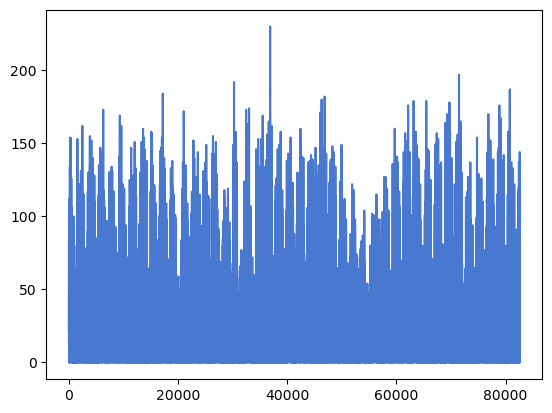

In [26]:
plt.plot(df_ost)

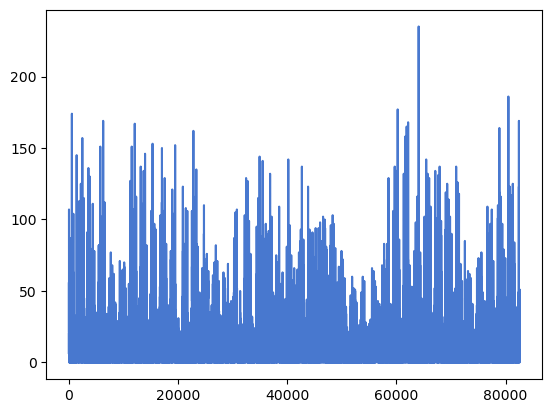

In [27]:
plt.plot(df_west)

In [28]:
# We come to the conclusion that df_ost and df_west are stationary. Differencing is not necessary
# in both cases

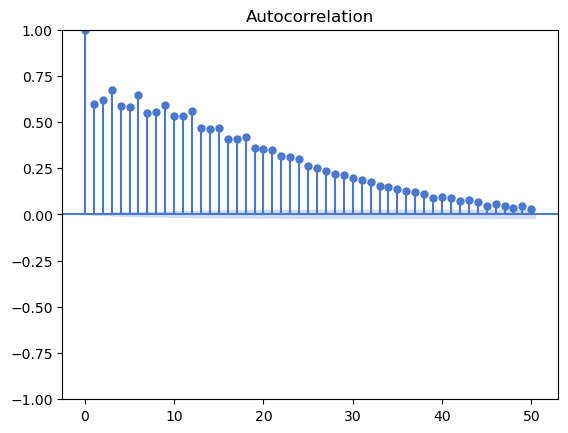

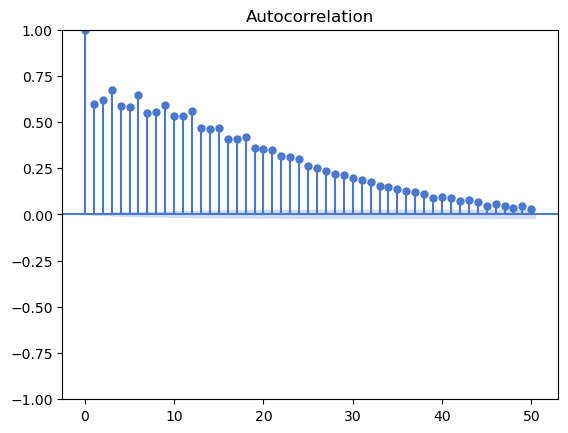

In [29]:
plot_acf(df_ost, lags = 50)

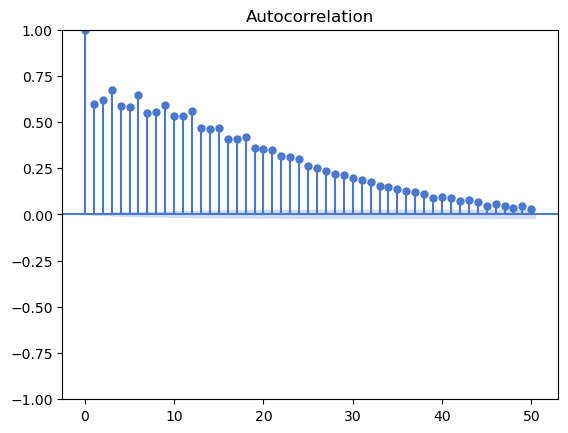

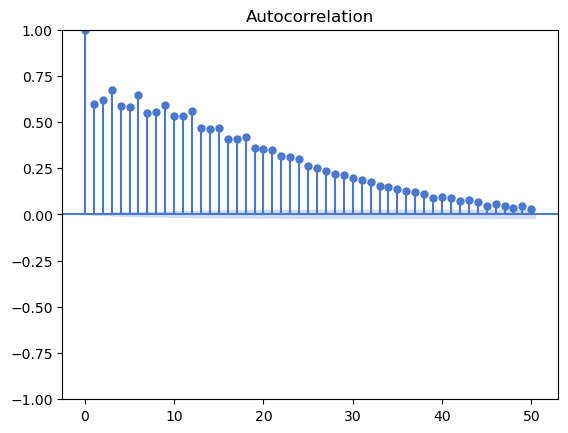

In [38]:
plot_acf(df_west)

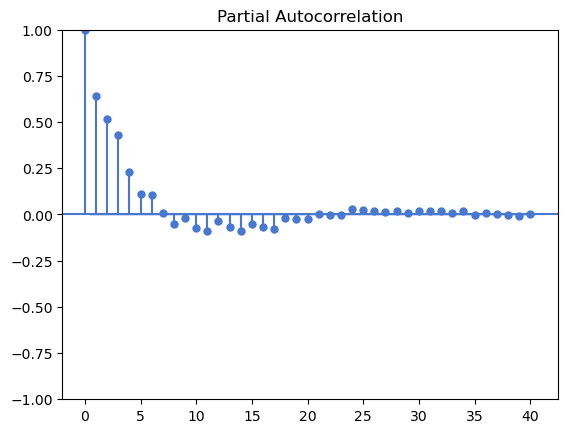

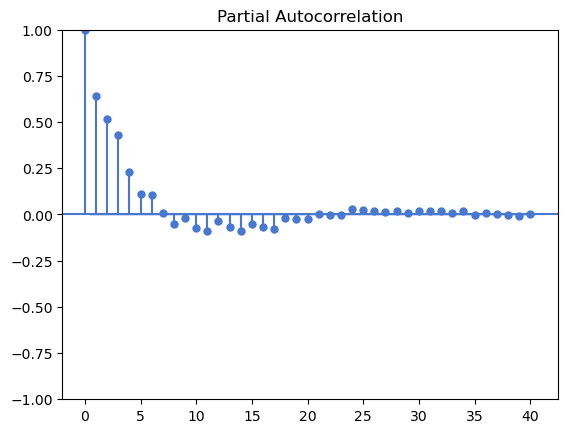

In [30]:
plot_pacf(df_ost, lags = 40, alpha = 0.05)
# wir entscheiden uns für ein lag von 5
# we decided to use the AR model after visual inspection of the PACF and ACF
# the ACF seems to be a sinus while the PCF tends to converge to zero

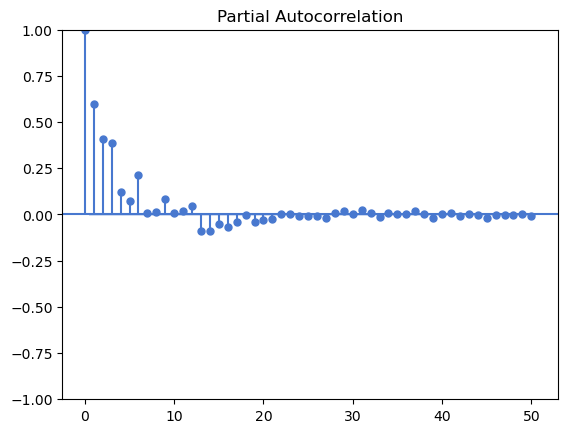

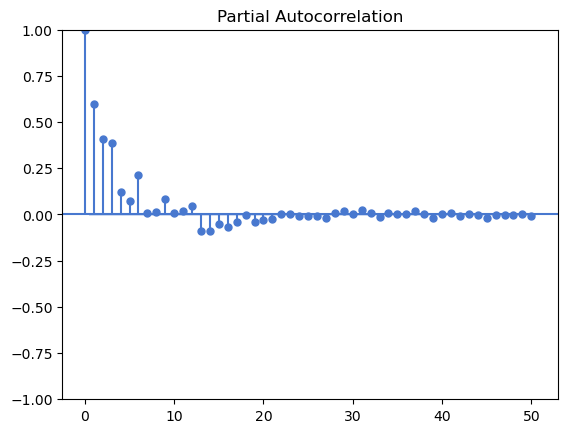

In [39]:
plot_pacf(df_west)

In [31]:
decomposition_ost = seasonal_decompose(df_ost, model='additive', filt=None, period=2018, two_sided=True, extrapolate_trend=0)
decomposition_ost

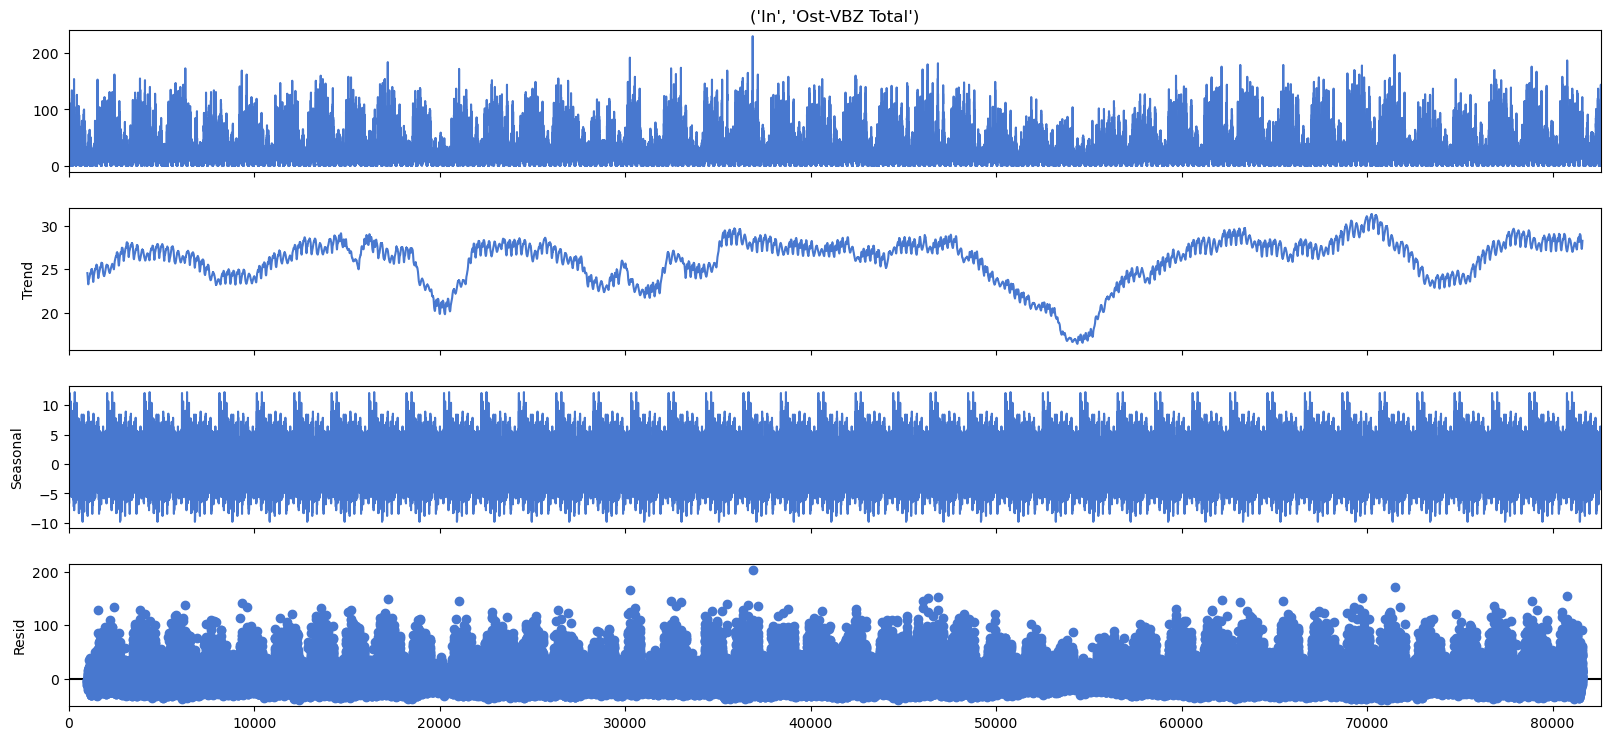

In [32]:
fig = decomposition_ost.plot()
fig.set_size_inches((18, 8))  ##
plt.show()

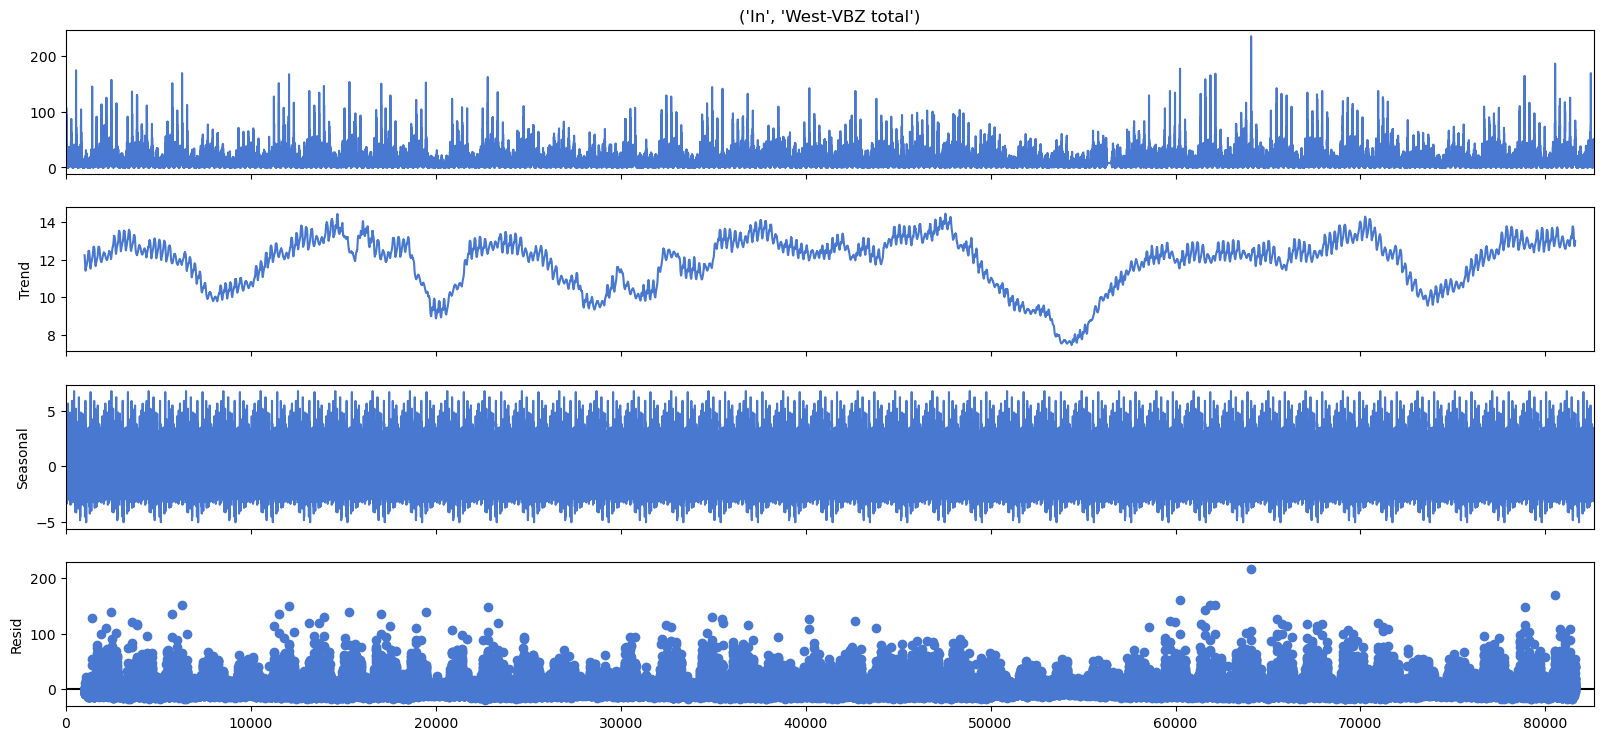

In [42]:
decomposition_west = seasonal_decompose(df_west, model='additive', filt=None, period=2018, two_sided=True, extrapolate_trend=0)
decomposition_west
fig = decomposition_west.plot()
fig.set_size_inches((18, 8))  ##
plt.show()

In [33]:
acf_ost = acf(df_ost, fft = True)
acf_ost

array([ 1.        ,  0.63889935,  0.71333939,  0.73645324,  0.69342525,
        0.68489063,  0.69649072,  0.65705113,  0.63973611,  0.64362582,
        0.60212966,  0.58376625,  0.58366972,  0.53975907,  0.5144235 ,
        0.50690342,  0.46555775,  0.43608834,  0.43291836,  0.3909212 ,
        0.36621599,  0.35379651,  0.31790834,  0.29379129,  0.28519675,
        0.25262966,  0.2305358 ,  0.21607891,  0.19220714,  0.17065865,
        0.16177987,  0.14083091,  0.12428725,  0.11187073,  0.10051775,
        0.08037837,  0.07780777,  0.06343522,  0.05172121,  0.04474282,
        0.03874952,  0.02398316,  0.02494674,  0.01689838,  0.00836326,
        0.00461954,  0.00367455, -0.00671351, -0.00961795, -0.01003516])

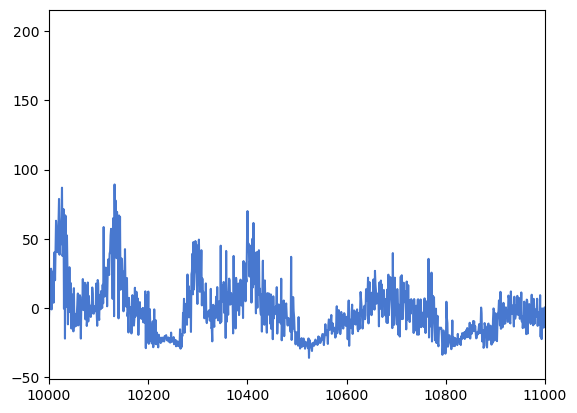

In [34]:
residuals_ost = df_ost - decomposition_ost.trend - decomposition_ost.seasonal
residuals_ost.dropna()

plt.plot(residuals_ost)
plt.xlim([10000, 11000])

plt.show()

In [35]:
result_residualsost = adfuller(residuals_ost.dropna())
print("ADF Statistic:", result_residualsost[0])
print("p-value:", result_residualsost[1])
print("Critical Values:", result_residualsost[4])
result_residualsost

ADF Statistic: -35.29808840646183
p-value: 0.0
Critical Values: {'1%': -3.430431197800238, '5%': -2.861575888060017, '10%': -2.566789101975191}


(-35.29808840646183,
 0.0,
 64,
 80538,
 {'1%': -3.430431197800238,
  '5%': -2.861575888060017,
  '10%': -2.566789101975191},
 648352.9111429141)

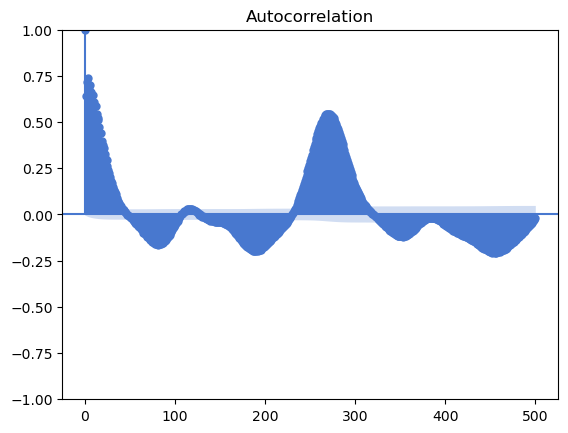

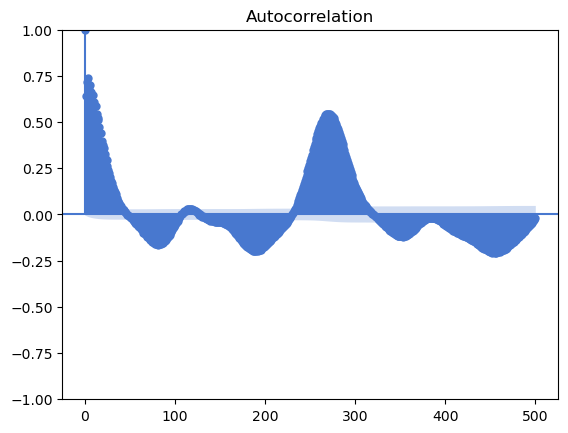

In [36]:
plot_acf(residuals_ost.dropna(),lags = 500)

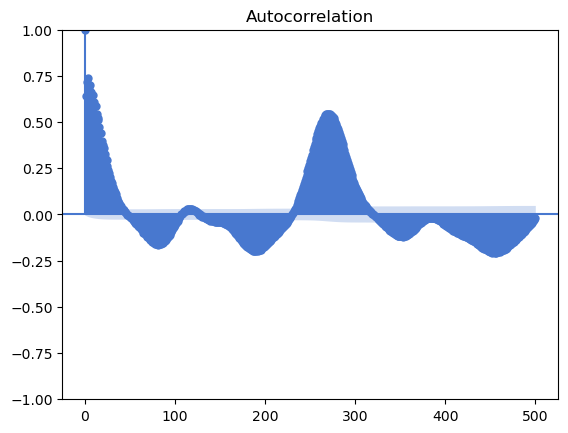

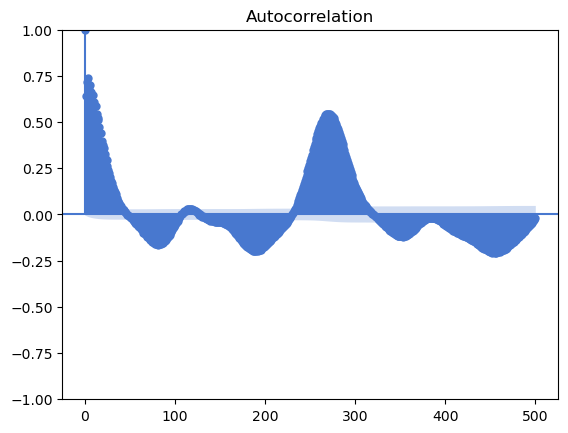

In [37]:
plot_acf(residuals_ost.dropna(),lags = 500)

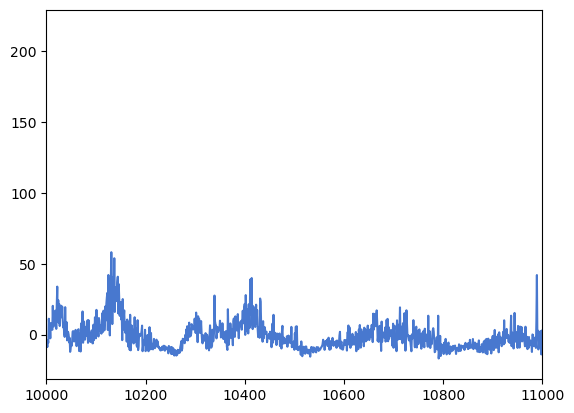

In [43]:
residuals_west = df_west - decomposition_west.trend - decomposition_west.seasonal
residuals_west.dropna()

plt.plot(residuals_west)
plt.xlim([10000, 11000])

plt.show()

In [110]:
# Forecasting

# 80% for training and 20% for testing

df_ost_train = int(len(df_ost)*0.8)
train_ost ,test_ost = df_ost[:df_ost_train], df_ost[df_ost_train:]

from sklearn.model_selection import TimeSeriesSplit
# rolling windows
tscv = TimeSeriesSplit(n_splits=10)

len(train_ost),len(test_ost)

(66096, 16525)

In [116]:
# We train our model with train_ost
import sklearn.metrics
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create and train the autoregressive model
lag_order = [ # Adjust this based on the ACF plot
model_ost = AutoReg(train_ost, lags= 2)
results_ar_ost = model_ost.fit()